# 二項係数 $\binom{2n}{n}$ を $n$ で割った余りについて
〜 "エレガントな解答求む"より〜

**問題:** 二項係数 $\binom{2n}{n}$ を $n$ で割った余りとして、'よく現れる'数があることを確認せよ。
さらに、それらの数がなぜ他の数よりも多く現れるのか、その理由を明らかにせよ。

## モジュール

In [9]:
import math
from decimal import *
getcontext().prec = (10**4)*1
from fractions import Fraction

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from functools import reduce

import pickle

## 二項係数

### 二項係数を返す関数の2種の定義

In [2]:
def binom(n,k):
    return Decimal(math.factorial(n))/Decimal(math.factorial(k)*math.factorial(n-k))

def binom01(n,k):
    if k==0:
        nume, deno = 1, 1
    else:
        nume = reduce(lambda x,y: x*y, range(n-k+1, n+1))
        deno = reduce(lambda x,y: x*y, range(1, k+1))
    return Decimal(nume/deno)

def binom02(n,k):
    rtn = 1
    for i in range(k):
        rtn = Fraction(rtn.numerator * (n-i), rtn.denominator * (k-i))
#         rtn = rtn * Fraction(n-i, k-i)  # <-- だいぶ遅い
    if rtn.denominator == 1:
        return Decimal(rtn.numerator)
    else:
        return None

In [3]:
num = 20
#print([binom(num, k) for k in range(0,num+1)])
print([binom01(num, k) for k in range(0,num+1)])
#print([binom02(num, k) for k in range(0,num+1)])

[Decimal('1'), Decimal('20'), Decimal('190'), Decimal('1140'), Decimal('4845'), Decimal('15504'), Decimal('38760'), Decimal('77520'), Decimal('125970'), Decimal('167960'), Decimal('184756'), Decimal('167960'), Decimal('125970'), Decimal('77520'), Decimal('38760'), Decimal('15504'), Decimal('4845'), Decimal('1140'), Decimal('190'), Decimal('20'), Decimal('1')]


### 2種の関数の速さ比べ

In [4]:
N = 10**2
%timeit [binom(2*n, n) for n in range(1,N)]
%timeit [binom01(2*n, n) for n in range(1,N)]
%timeit [binom02(2*n, n) for n in range(1,N)]

787 µs ± 3.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.11 ms ± 3.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
10.2 ms ± 198 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
X = [binom01(2*n, n) for n in tqdm(range(1,N))]

100%|██████████| 99/99 [00:00<00:00, 66331.64it/s]


In [6]:
Y = [binom02(2*n, n) for n in tqdm(range(1,N))]

100%|██████████| 99/99 [00:00<00:00, 4132.81it/s]


In [7]:
X==Y

False

## グラフ描画

### $n = 1, 2, \dots, 2000$ において

In [11]:
N = (10**3)*2

X = range(1,N+1)
Y = [binom(2*n,n)%n for n in X]

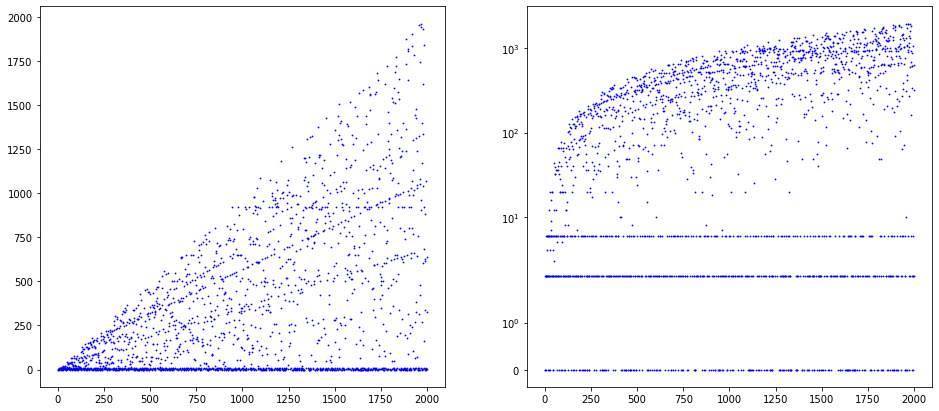

In [12]:
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(X, Y, 'b.', ms = 1.6)
plt.subplot(122)
plt.plot(X, Y, 'b.', ms = 1.6)
plt.yscale('symlog')

plt.show()

### `pickle` モジュール (データの永続化) の利用

#### データをピックル化

In [ ]:
import os.path

if false:
    N = 10**4
    getcontext().prec = N
    
    filename = 'data_'+str(N)+'.pickle'
    
    if os.path.exists(filename):
        print('{} exists'.format(filename))
    else:
        data = {
            'range': range(1,N+1),
            'values': [int(binom02(2*n,n)%n) for n in tqdm(range(1,N+1))]
            }
        with open(filename, 'wb') as f:
            # Pickle the 'data' dictionary using the highest protocol available.
            pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

#### ピックル化されたデータを読み込み描画

In [ ]:
# pickle 化されたデータを読み込みます。

filename = 'data_10000.pickle'
with open(filename, 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    data = pickle.load(f)

## 余りとして現れる数値の頻度

In [13]:
N = 5000 # 2000 # 10000 # 3000

with open('data_10000.pickle', 'rb') as f:
    data = pickle.load(f)

In [14]:
rmd = range(10**4)
cnt = [data['values'].count(n) for n in rmd]

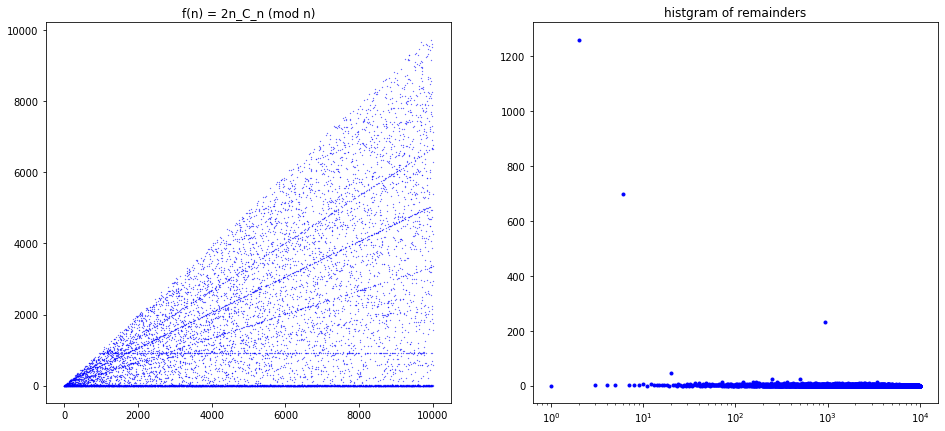

In [15]:
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(rmd, data['values'], 'b.', ms = 0.5)
plt.title('f(n) = 2n_C_n (mod n)')
plt.subplot(122)
# plt.plot(X, cnt, lw = 0.5)
plt.plot(rmd, cnt, 'b.')
plt.title('histgram of remainders')
plt.xscale('log')
# plt.yscale('log')

plt.show()

In [23]:
vlist = {num: data['values'][:2000].count(num) for num in rmd}.items()
ranking = sorted(vlist, key=lambda vlist: vlist[1], reverse=True)[0:10]
for pair in ranking:
    print("{:<4}: {:<4}times".format(pair[0], pair[1]))

2   : 320 times
0   : 211 times
6   : 185 times
924 : 34  times
20  : 18  times
504 : 16  times
252 : 11  times
36  : 10  times
72  : 10  times
40  : 9   times


In [24]:
print([k + 1 for k in range(1,101) if data['values'][k] == 2])

[3, 4, 5, 7, 9, 11, 13, 17, 19, 23, 25, 29, 31, 37, 41, 43, 47, 49, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101]


In [25]:
print([k + 1 for k in range(1,101) if data['values'][k] == 0])

[2, 6, 15, 20, 28, 42, 45, 66, 77, 88, 91]


In [26]:
print([k + 1 for k in range(1,2000) if data['values'][k] == 924])

[942, 978, 1014, 1038, 1074, 1086, 1146, 1158, 1182, 1194, 1266, 1338, 1362, 1374, 1398, 1434, 1446, 1458, 1506, 1542, 1578, 1614, 1626, 1659, 1662, 1686, 1698, 1734, 1758, 1842, 1866, 1878, 1902, 1986]


## 証明

$$
\binom{2n}{n} 
= \frac{2n!}{n!n!} 
= \frac{2n(2n-1)\dots(n+2)(n+1)}{n(n-1)\dots21}
= \frac{2n}{n}\frac{2n-1}{n-1}\dots\frac{n+2}{2}\frac{n+1}{1}
$$
$$
= \prod_{k=0}^{n-1} \frac{2n-k}{n-k}
= \prod_{k=0}^{n-1} \left(\frac{n-k+n}{n-k}\right)
= \prod_{k=0}^{n-1} \left(1+\frac{n}{n-k}\right)
$$

$$
\binom{2n}{n} 
= \frac{2n!}{n!n!} 
= \frac{2n(2n-1)\dots21}{n(n-1)\dots21n(n-1)\dots21}
= \frac{2n(2n-2)\dots42}{n(n-1)\dots21}\frac{(2n-1)(2n-3)\dots31}{n(n-1)\dots21}
$$